## HyperSliceView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@46da6166

This `Op` wraps the `Views.hyperSlice()` method of ImgLib2, taking one (N-1)-dimensional slice out of a N-dimensional `RandomAccessibleInterval`. Let's see how this `Op` is called:

In [2]:
ij.op().help('hyperSliceView')

Available operations:
	(IntervalView out) =
	net.imagej.ops.transform.hyperSliceView.IntervalHyperSliceView(
		RandomAccessibleInterval in,
		int d,
		long pos)
	(MixedTransformView out) =
	net.imagej.ops.transform.hyperSliceView.DefaultHyperSliceView(
		RandomAccessible in,
		int d,
		long pos)

Let's outline the parameters, since this can be a bit confusing:
* `RandomAccessibleInterval`/`RandomAccessible` `in`: The input image
* `int d`: the dimension that we are going to make cuts in
* `long pos`: the position along dimension 'd' that we want to extract

Let's grab an 3-dimensional `Img` to illustrate this:

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


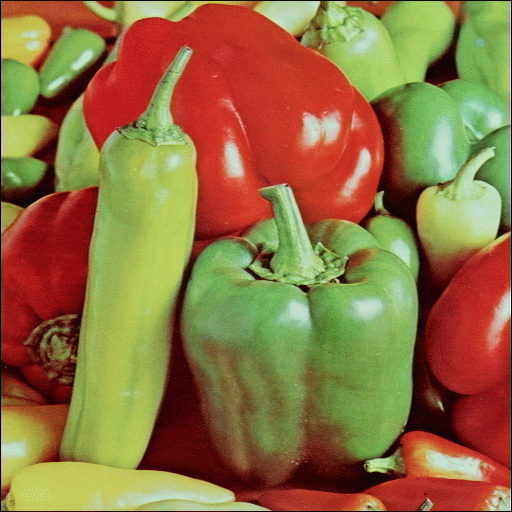

In [3]:
import net.imglib2.util.Intervals

input = ij.scifio().datasetIO().open("http://imagej.net/images/peppers.gif")

ij.notebook().display(input)

Let's say that we really only care about those green peppers. We can then simplify the image by taking a `hyperslice` through the second dimension, taking out the second (green) channel and leaving the red and blue ones behind. Since we are going to be taking out a channel (as opposed to taking out a certain width or height), `d` will be set to `2`, and because we want the green channel (as opposed to the red or blue channel), `pos` will (also) be set to `2`:

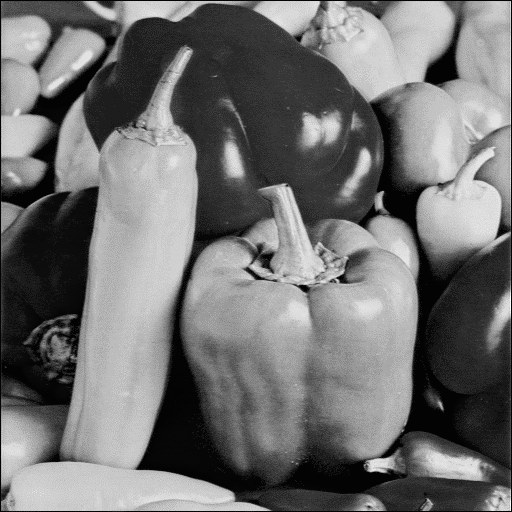

In [4]:
//dimension that we are slicing
dimension = 2

//slice from dimension that we want
pos = 1

output = ij.op().run("hyperSliceView", input, dimension, pos)

ij.notebook().display(output)